![gym](gym.png)


You are a product manager for a fitness studio and are interested in understanding the current demand for digital fitness classes. You plan to conduct a market analysis in Python to gauge demand and identify potential areas for growth of digital products and services.

### The Data

You are provided with a number of CSV files in the "Files/data" folder, which offer international and national-level data on Google Trends keyword searches related to fitness and related products. 

### workout.csv

| Column     | Description              |
|------------|--------------------------|
| `'month'` | Month when the data was measured. |
| `'workout_worldwide'` | Index representing the popularity of the keyword 'workout', on a scale of 0 to 100. |

### three_keywords.csv

| Column     | Description              |
|------------|--------------------------|
| `'month'` | Month when the data was measured. |
| `'home_workout_worldwide'` | Index representing the popularity of the keyword 'home workout', on a scale of 0 to 100. |
| `'gym_workout_worldwide'` | Index representing the popularity of the keyword 'gym workout', on a scale of 0 to 100. |
| `'home_gym_worldwide'` | Index representing the popularity of the keyword 'home gym', on a scale of 0 to 100. |

### workout_geo.csv

| Column     | Description              |
|------------|--------------------------|
| `'country'` | Country where the data was measured. |
| `'workout_2018_2023'` | Index representing the popularity of the keyword 'workout' during the 5 year period. |

### three_keywords_geo.csv

| Column     | Description              |
|------------|--------------------------|
| `'country'` | Country where the data was measured. |
| `'home_workout_2018_2023'` | Index representing the popularity of the keyword 'home workout' during the 5 year period. |
| `'gym_workout_2018_2023'` | Index representing the popularity of the keyword 'gym workout' during the 5 year period.  |
| `'home_gym_2018_2023'` | Index representing the popularity of the keyword 'home gym' during the 5 year period. |

In [44]:
# Import the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

## Load data on global interest in workouts

In [45]:
# Start coding here
workout = pd.read_csv('data/workout.csv')
workout.head()

,month,workout_worldwide
0,2018-03,59
1,2018-04,61
2,2018-05,57
3,2018-06,56
4,2018-07,51


## Find the time of peak searches for workout

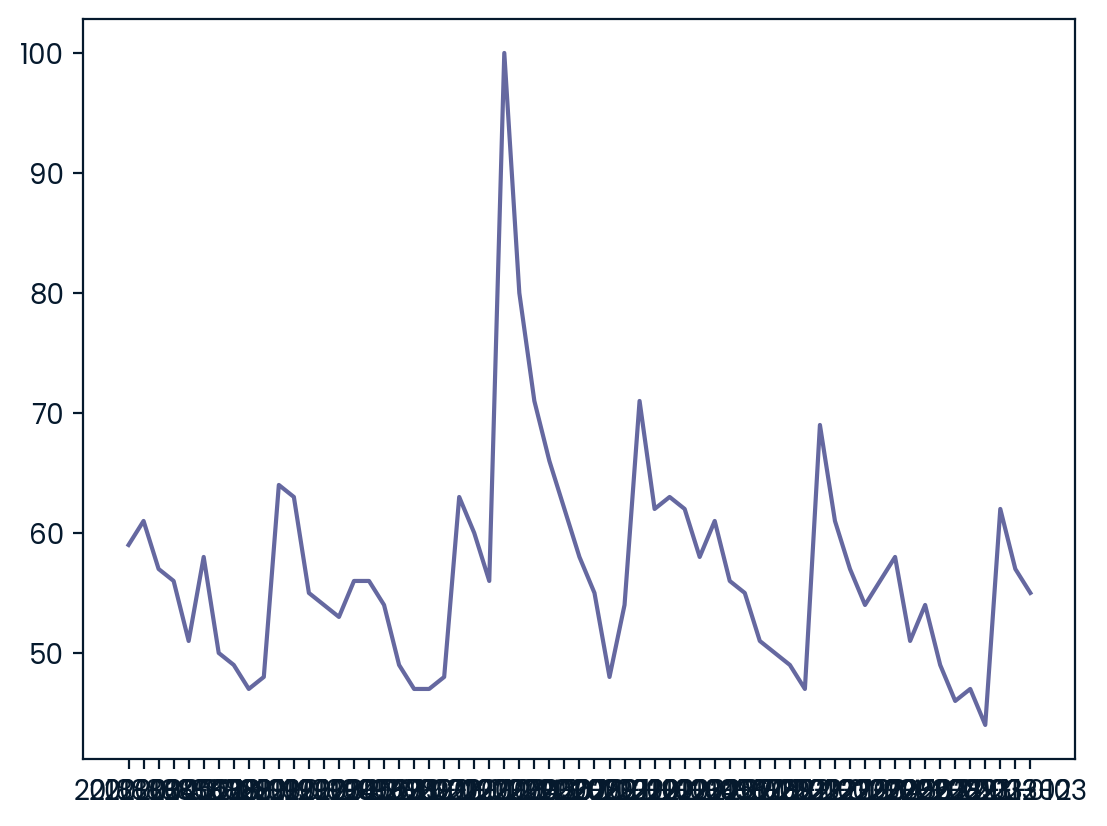

In [46]:
plt.plot(workout['month'], workout['workout_worldwide'])
plt.show()

In [47]:
workout['month'] = pd.to_datetime(workout['month'])
year_str = workout.loc[workout['workout_worldwide'].idxmax()]
year_str=year_str['month'].year
year_str = str(year_str)
year_str

'2020'

In [48]:
three_keywords = pd.read_csv('data/three_keywords.csv')
three_keywords.head()

,month,home_workout_worldwide,gym_workout_worldwide,home_gym_worldwide
0,2018-03,12,16,10
1,2018-04,12,18,10
2,2018-05,13,16,9
3,2018-06,12,17,9
4,2018-07,12,17,9


In [49]:
three_keywords.columns

Index(['month', 'home_workout_worldwide', 'gym_workout_worldwide',
       'home_gym_worldwide'],
      dtype='object')

[]

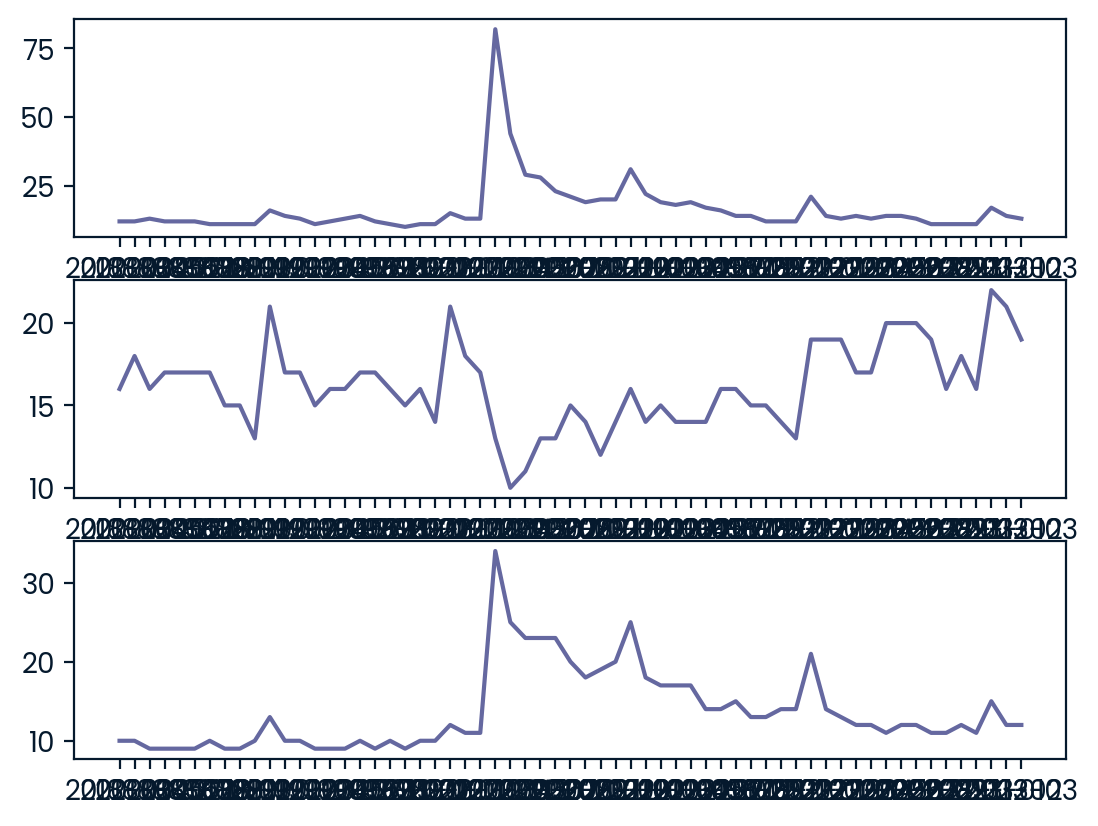

In [50]:
fig,ax = plt.subplots(3)
ax[0].plot(three_keywords['month'],three_keywords['home_workout_worldwide'])
ax[1].plot(three_keywords['month'],three_keywords['gym_workout_worldwide'])
ax[2].plot(three_keywords['month'],three_keywords['home_gym_worldwide'])
plt.plot()

In [51]:
three_keywords['month'] = pd.to_datetime(three_keywords['month'])
covid_data = three_keywords.loc[three_keywords['month'].dt.year == '2020']

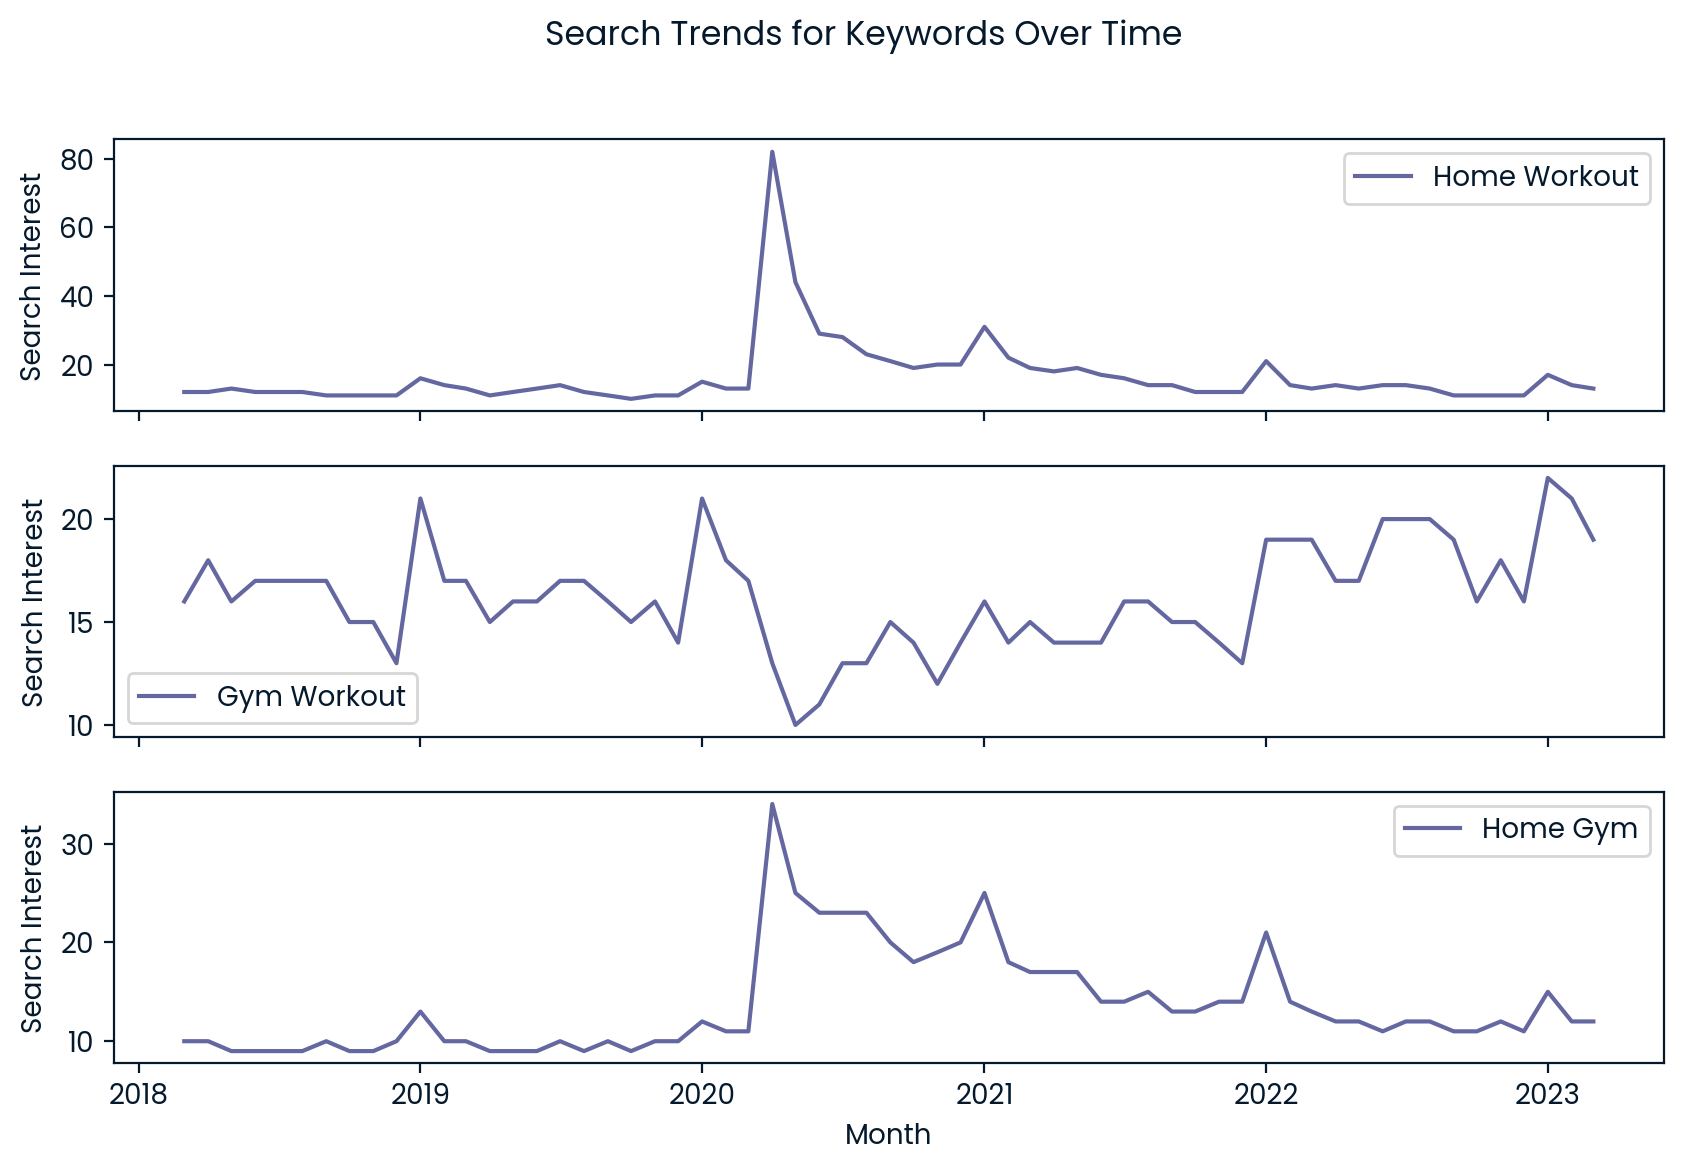

Most popular keyword during COVID pandemic (2020): home_workout
Most popular keyword now: gym_workout


In [52]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'three_keywords' is the DataFrame with columns:
# 'month', 'home_workout_worldwide', 'gym_workout_worldwide', 'home_gym_worldwide'

# Convert 'month' column to datetime format
three_keywords['month'] = pd.to_datetime(three_keywords['month'])

# Filter data for 2020 (COVID pandemic period)
covid_data = three_keywords[three_keywords['month'].dt.year == 2020]

# Find the maximum value and corresponding keyword during the pandemic
covid_peak_values = {
    "home_workout": covid_data['home_workout_worldwide'].max(),
    "gym_workout": covid_data['gym_workout_worldwide'].max(),
    "home_gym": covid_data['home_gym_worldwide'].max()
}
peak_covid = max(covid_peak_values, key=covid_peak_values.get)  # Most popular during COVID

# Find the most recent data point (current)
latest_row = three_keywords.iloc[-1]  # Last row of the DataFrame
current_values = {
    "home_workout": latest_row['home_workout_worldwide'],
    "gym_workout": latest_row['gym_workout_worldwide'],
    "home_gym": latest_row['home_gym_worldwide']
}
current = max(current_values, key=current_values.get)  # Most popular currently

# Plot the data
fig, ax = plt.subplots(3, figsize=(10, 6), sharex=True)
ax[0].plot(three_keywords['month'], three_keywords['home_workout_worldwide'], label="Home Workout")
ax[1].plot(three_keywords['month'], three_keywords['gym_workout_worldwide'], label="Gym Workout")
ax[2].plot(three_keywords['month'], three_keywords['home_gym_worldwide'], label="Home Gym")

for a in ax:
    a.legend()
    a.set_ylabel("Search Interest")
ax[2].set_xlabel("Month")
plt.suptitle("Search Trends for Keywords Over Time")
plt.show()

# Output results
print("Most popular keyword during COVID pandemic (2020):", peak_covid)
print("Most popular keyword now:", current)


In [53]:
workout_geo = pd.read_csv('data/workout_geo.csv')
workout_geo.head()

,country,workout_2018_2023
0,Guam,NaN
1,Falkland Islands (Islas Malvinas),NaN
2,Cook Islands,NaN
3,Brunei,NaN
4,Palau,NaN


In [54]:
coun = ['United States', 'Australia', 'Japan']
result = []

for country in coun:
    r = workout_geo[workout_geo['country'] == country]['workout_2018_2023'].sum()
    result.append(r)

top_country = coun[result.index(max(result))]
print(top_country)


United States


In [55]:
three_keywords_geo = pd.read_csv('data/three_keywords_geo.csv')
three_keywords_geo.head()

,Country,home_workout_2018_2023,gym_workout_2018_2023,home_gym_2018_2023
0,Gibraltar,NaN,NaN,NaN
1,Lesotho,NaN,NaN,NaN
2,Guam,NaN,NaN,NaN
3,Botswana,NaN,NaN,NaN
4,Brunei,NaN,NaN,NaN


In [56]:
three_keywords_geo.columns

Index(['Country', 'home_workout_2018_2023', 'gym_workout_2018_2023',
       'home_gym_2018_2023'],
      dtype='object')

In [57]:
coun = ['Philippines' , 'Malaysia']
result = []

for country in coun:
    r = three_keywords_geo[three_keywords_geo['Country'] == country]['home_workout_2018_2023'].sum()
    result.append(r)

home_workout_geo = coun[result.index(max(result))]
print(top_country)

United States
